In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy import wcs
from astropy.io import ascii
from astropy.table import Table, Column, MaskedColumn
from pathlib import Path
from math import trunc
%matplotlib inline

In [72]:
# Retreive all the data from the meta-data file
meta_data = ascii.read('../datared/J0600_meta-data.txt')
epoch_tmp = meta_data["EPOCH"]
sort = np.argsort(np.array(epoch_tmp))
epoch = np.array(epoch_tmp[sort])

filters = np.array(meta_data["FILTER"])[sort]
airmass = np.array(meta_data["AIRMASS"][sort])

fits_name = np.array(meta_data["IMAGE"][sort])
files = np.array(meta_data["NEWIMG"][sort])

N_files = len(epoch) #nr of files
N_stars = len(ascii.read(files[0])["STARNR"])
print ("Number of files = {}".format(N_files))
print ("Number of stars = {}".format(N_stars))

Number of files = 45
Number of stars = 44


In [73]:
# Retreive the flux and fluxerr data from all the other files
flux_tmp = np.zeros((N_files,N_stars))
fluxerr_tmp = np.zeros((N_files,N_stars))

for i in range(N_files):
    file = files[i]
    
    filecontent = ascii.read(file)
    flux_tmp[i] = filecontent["FLUX"]
    fluxerr_tmp[i] = filecontent["FLUXERR"]

flux = flux_tmp[sort]
fluxerr = fluxerr_tmp[sort]

In [75]:
# Make a mask for all the filters:
dif_f = []
for f in filters:
    if f not in dif_f:
        dif_f.append(f)
print (dif_f)

filter_msk = []
for i in range(len(dif_f)):
    filter_msk.append(filters == dif_f[i])
filter_msk = np.array(filter_msk)

['gp', 'ip', 'rp']


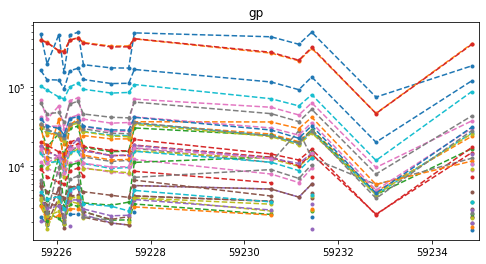

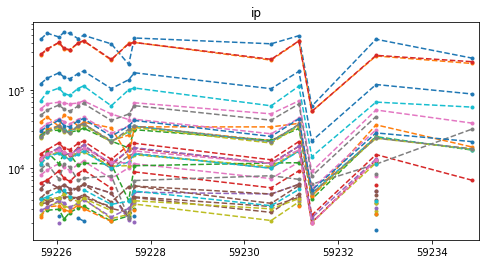

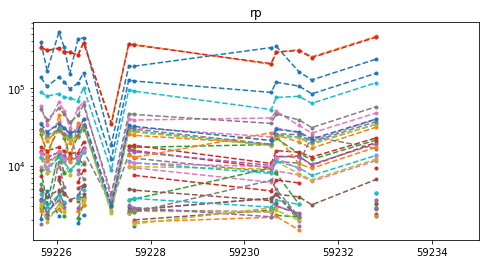

In [99]:
for i in range(len(dif_f)):
    plt.figure(figsize=(8,4))
    for j in range(0,N_stars):
        if (j-7)%10 !=0:
            plt.semilogy(epoch[filter_msk[i]],flux[filter_msk[i]][:,j],linestyle='dashed',marker='.')#, label="Star "+str(j))
    plt.title(dif_f[i])
    plt.axis(xmin=59225.5,xmax=59235)
    #plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
    plt.plot()